# Chapter py_05 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

# Probability

## Converting counts to probabilities

In [2]:
import random
random.seed(1245)

counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
for _ in range(20):
    outcome = random.randint(1, 6)
    counts[outcome] += 1
sum_counts = sum(counts.values())
probabilities = {key: count / sum_counts for key, count in counts.items()}

print("counts:", counts)
print("sum of counts:", sum_counts)
print("probabilities:", probabilities)

counts: {1: 2, 2: 6, 3: 3, 4: 2, 5: 5, 6: 2}
sum of counts: 20
probabilities: {1: 0.1, 2: 0.3, 3: 0.15, 4: 0.1, 5: 0.25, 6: 0.1}


In [3]:
counts_list = [2, 6, 3, 2, 5, 2]
sum_counts = sum(counts_list)
probabilities = [count / sum_counts for count in counts_list]

In [4]:
import pandas as pd
counts_df = pd.DataFrame({"outcome": k, "count": v} for k, v in counts.items())
counts_df["probability"] = counts_df["count"] / counts_df["count"].sum()
counts_df

,outcome,count,probability
0,1,2,0.10
1,2,6,0.30
2,3,3,0.15
3,4,2,0.10
4,5,5,0.25
5,6,2,0.10


## Probability distributions in random

In [5]:
import random
random.seed(321)

print("uniform:", ", ".join([f"{random.uniform(3, 10):.3f}" for _ in range(3)]))
print("normal:", ", ".join([f"{random.gauss(1, 3):.3f}" for _ in range(3)]))
print("poisson:", ", ".join([f"{random.expovariate(0.5):.3f}" for _ in range(3)]))

uniform: 4.928, 3.879, 6.932
normal: -6.217, 3.752, 7.947
poisson: 1.214, 2.938, 2.187


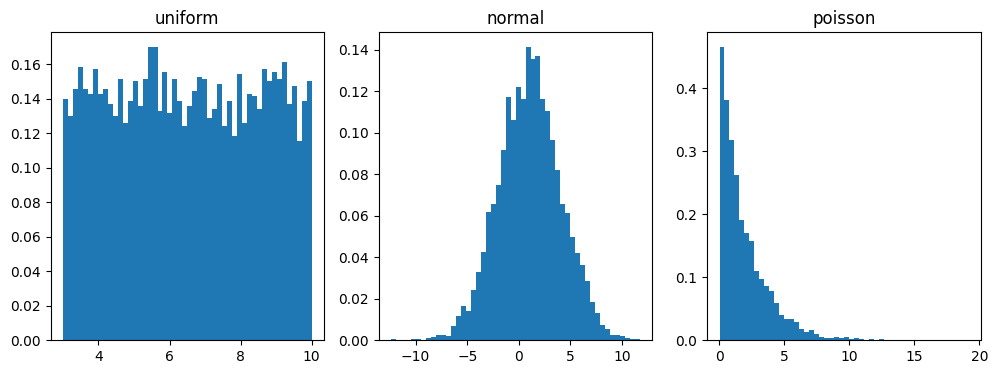

In [6]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=3)
axes[0].hist([random.uniform(3, 10) for _ in range(5000)], bins=50, density=True)
axes[0].set_title("uniform")
axes[1].hist([random.gauss(1, 3) for _ in range(5000)], bins=50, density=True)
axes[1].set_title("normal")
axes[2].hist([random.expovariate(0.5) for _ in range(5000)], bins=50, density=True)
axes[2].set_title("poisson")
plt.show()

## Probability distributions in the scipy} package

### Continuous distributions

In [7]:
import numpy as np
from scipy import stats

rng = np.random.default_rng(seed=783)
samples = stats.norm.rvs(loc=1, scale=3, size=5000, random_state=rng)
print(samples)

[ 3.87280849  3.49605883  1.55079719 ... -1.93997238 -2.76834212
  5.73210174]


In [8]:
rng = np.random.default_rng(seed=783)
dist = stats.norm(loc=1, scale=3)
samples = dist.rvs(size=5000, random_state=rng)

In [9]:
dist = stats.norm()  # standard normal distribution
print("mean:", dist.mean())
print("standard deviation:", dist.std())
print("median:", dist.median())
print("variance:", dist.var())
print("(mean, variance, skewness, kurtosis)", dist.stats(moments="mvsk"))

mean: 0.0
standard deviation: 1.0
median: 0.0
variance: 1.0
(mean, variance, skewness, kurtosis) (0.0, 1.0, 0.0, 0.0)


In [10]:
print("90% interval:", dist.interval(0.9))
print("95% interval:", dist.interval(0.95))

90% interval: (-1.6448536269514729, 1.6448536269514722)
95% interval: (-1.959963984540054, 1.959963984540054)


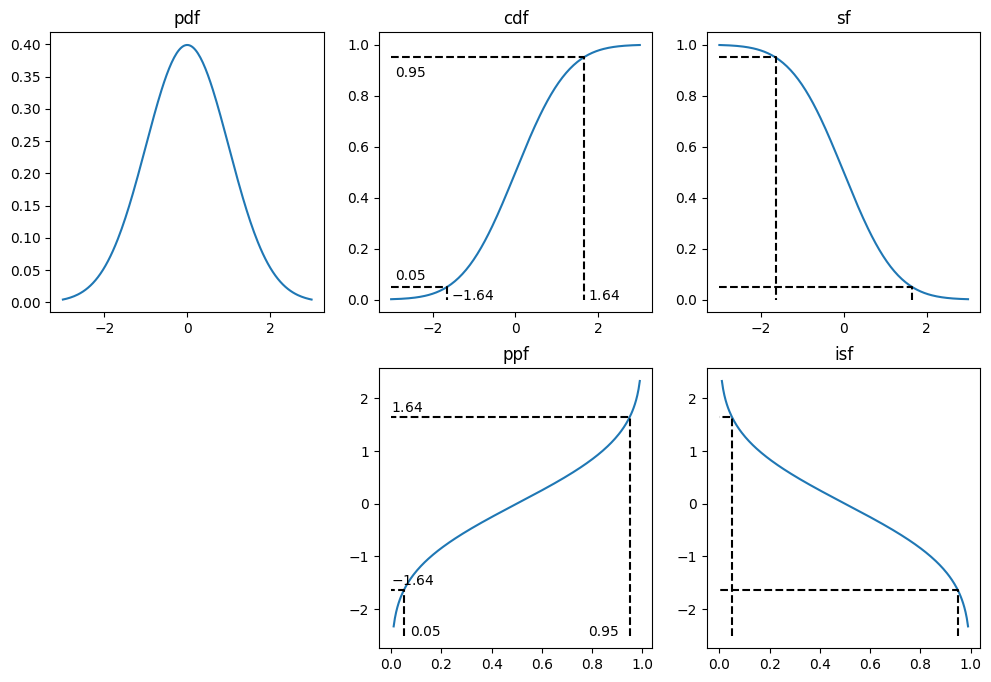

In [11]:
x = np.linspace(-3, 3, 200)

fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)
axes[0, 0].plot(x, dist.pdf(x))
axes[0, 0].set_title("pdf")
ci_90 = dist.interval(0.9)
ax = axes[0, 1]
ax.plot(x, dist.cdf(x))
ax.set_title("cdf")
ax.plot([-3, ci_90[0], ci_90[0]], [0.05, 0.05, 0], "--", color="black")
ax.plot([-3, ci_90[1], ci_90[1]], [0.95, 0.95, 0], "--", color="black")
ax.text(-2.9, 0.075, "0.05")
ax.text(-2.9, 0.875, "0.95")
ax.text(ci_90[0] + 0.1, 0, f"${ci_90[0]:.2f}$")
ax.text(ci_90[1] + 0.1, 0, f"${ci_90[1]:.2f}$")
ax = axes[0, 2]
ax.plot(x, dist.sf(x))
ax.set_title("sf")
ax.plot([-3, ci_90[1], ci_90[1]], [0.05, 0.05, 0], "--", color="black")
ax.plot([-3, ci_90[0], ci_90[0]], [0.95, 0.95, 0], "--", color="black")

x = np.linspace(0.01, 0.99, 200)
axes[1, 0].set_axis_off()
ax = axes[1, 1]
ax.plot(x, dist.ppf(x))
ax.set_title("ppf")
ax.plot([0.05, 0.05, 0], [-2.5, ci_90[0], ci_90[0]], "--", color="black")
ax.plot([0.95, 0.95, 0], [-2.5, ci_90[1], ci_90[1]], "--", color="black")
ax.text(0.075, -2.5, "0.05")
ax.text(0.785, -2.5, "0.95")
ax.text(0, ci_90[0] + 0.1, f"${ci_90[0]:.2f}$")
ax.text(0, ci_90[1] + 0.1, f"${ci_90[1]:.2f}$")
ax = axes[1, 2]
ax.plot(x, dist.isf(x))
ax.set_title("isf")
ax.plot([0.05, 0.05, 0], [-2.5, ci_90[1], ci_90[1]], "--", color="black")
ax.plot([0.95, 0.95, 0], [-2.5, ci_90[0], ci_90[0]], "--", color="black")
plt.show()

In [12]:
within_1std = stats.norm.cdf(1) - stats.norm.cdf(-1)
within_2std = stats.norm.cdf(2) - stats.norm.cdf(-2)
within_3std = stats.norm.cdf(3) - stats.norm.cdf(-3)
print(f"within 1 std of mean: {within_1std:.2%}")
print(f"within 2 std of mean: {within_2std:.2%}")
print(f"within 3 std of mean: {within_3std:.2%}")

within 1 std of mean: 68.27%
within 2 std of mean: 95.45%
within 3 std of mean: 99.73%


### Discrete distributions

In [13]:
dist = stats.binom(5, 0.3)
df = pd.DataFrame({
    "hits": range(6),
    "probability": [dist.pmf(hits) for hits in range(6)],
})
df

,hits,probability
0,0,0.16807
1,1,0.36015
2,2,0.30870
3,3,0.13230
4,4,0.02835
5,5,0.00243


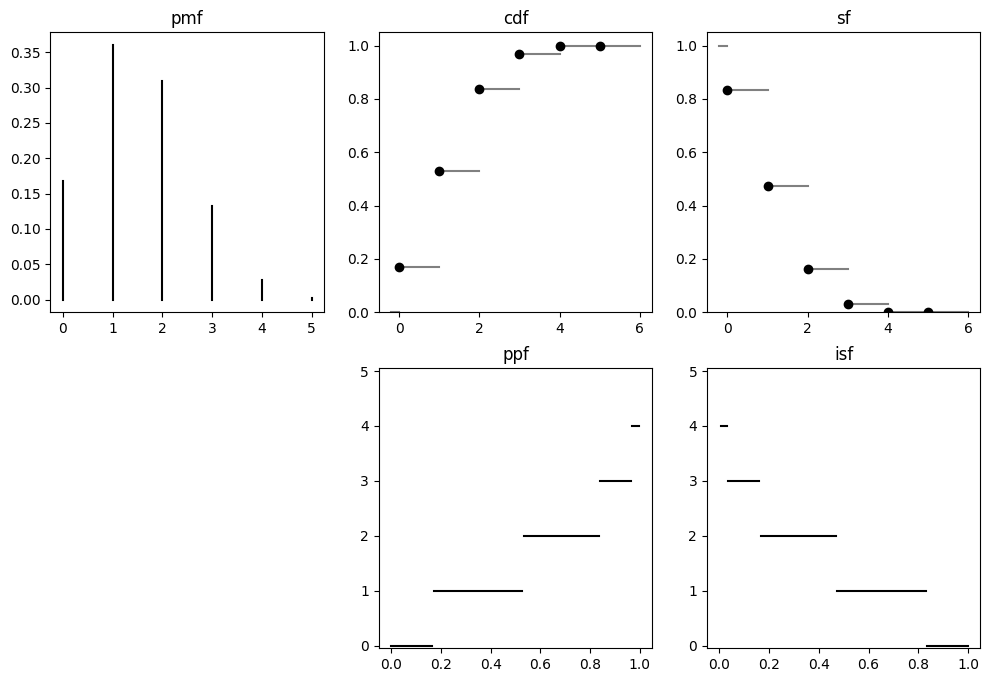

In [14]:
x = list(range(0, 6))

fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)
for xi in x:
    axes[0, 0].plot((xi, xi), (0, dist.pmf(xi)), color="black")
axes[0, 0].set_title("pmf")
ax = axes[0, 1]
ax.plot((-0.2, 0), (0, 0), color="grey")
for xi in x:
    yi = dist.cdf(xi)
    ax.plot((xi, xi+1), (yi, yi), color="grey")
    ax.plot(xi, yi, "o", color="black")
ax.set_ylim(0, 1.05)
ax.set_title("cdf")
ax = axes[0, 2]
ax.plot((-0.2, 0), (1, 1), color="grey")
for xi in x:
    yi = dist.sf(xi)
    ax.plot((xi, xi+1), (yi, yi), color="grey")
    ax.plot(xi, yi, "o", color="black")
ax.set_title("sf")
ax.set_ylim(0, 1.05)

x = np.linspace(0.0001, 0.9999, 200)
axes[1, 0].set_axis_off()
ax = axes[1, 1]
yl = dist.ppf(x[0])
xl = x[0]
xr = xl
yr = yl
for xi in x:
    yi = dist.ppf(xi)
    if yi != yl:
        ax.plot((xl, xr), (yl, yr), color="black")
        xl = xi; yl = yi
    yr = yi
    xr = xi
ax.plot((xl, xr), (yl, yr), color="black")
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 5.05)

ax.set_title("ppf")
ax = axes[1, 2]
yl = dist.isf(x[0])
xl = x[0]
xr = xl
yr = yl
for xi in x:
    yi = dist.isf(xi)
    if yi != yl:
        ax.plot((xl, xr), (yl, yr), color="black")
        xl = xi; yl = yi
    xr = xi
    yr = yi
ax.plot((xl, xr), (yl, yr), color="black")
ax.set_title("isf")
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 5.05)
plt.show()

In [15]:
print(f"probability of 3 hits: {dist.pmf(3):.4f}")
print(f"probability of 3 or fewer hits: {dist.cdf(3):.4f}")
print(f"probability of 3 or more hits: {dist.sf(2):.4f}")

probability of 3 hits: 0.1323
probability of 3 or fewer hits: 0.9692
probability of 3 or more hits: 0.1631


In [16]:
random.seed(321)
hits = [random.choices([0, 1], weights=[0.7, 0.3], k=5).count(1)
        for _ in range(1000)]
hits = np.array(hits)
print(f"probability of 3 hits: {sum(hits == 3) / len(hits):.4f}")
print(f"probability of 3 or fewer hits: {sum(hits <= 3) / len(hits):.4f}")
print(f"probability of 3 or more hits: {sum(hits >= 3) / len(hits):.4f}")

probability of 3 hits: 0.1430
probability of 3 or fewer hits: 0.9760
probability of 3 or more hits: 0.1670
